In [13]:
import pandas as pd
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType

In [14]:
spark = SparkSession.builder \
        .config("spark.executor.memory", "32g") \
        .config("spark.driver.memory", "32g") \
        .config("spark.sql.pivotMaxValues", "140000") \
        .config("spark.executor.cores", "8") \
        .appName("hw4") \
        .master("local[*]") \
        .getOrCreate()
spark

In [31]:
prediction = spark.read.option("header", "true").csv('../out/predictions_total-1606258234-1000000.csv/')
prediction = prediction.withColumn('userId', F.col('userId').cast(IntegerType()))
prediction = prediction.withColumn('movieId', F.col('movieId').cast(IntegerType()))
prediction = prediction.withColumn('rating', F.col('rating').cast(DoubleType()))
prediction = prediction.withColumn('prediction_item_item_cf', F.col('prediction_item_item_cf').cast(DoubleType()))
prediction = prediction.withColumn('prediction_als', F.col('prediction_als').cast(DoubleType()))
prediction = prediction.withColumn('prediction', F.col('prediction').cast(DoubleType()))
prediction.show()

+------+-------+------+-----------------------+--------------+------------------+
|userId|movieId|rating|prediction_item_item_cf|prediction_als|        prediction|
+------+-------+------+-----------------------+--------------+------------------+
|     1|     32|   3.5|                    3.9|     3.7930923|  3.85723690032959|
|     1|    223|   4.0|                    3.7|     3.8018858| 3.740754337310791|
|     1|    541|   4.0|     3.8666666666666667|      4.085435|3.9541739654541015|
|     1|   1080|   3.5|     3.8333333333333335|     3.8856933| 3.854277324676514|
|     1|   1089|   3.5|     3.8666666666666667|     4.0098395|3.9239358139038085|
|     1|   1208|   3.5|                    3.9|      4.033429| 3.953371658325195|
|     1|   1243|   3.0|     3.7666666666666666|      4.043142| 3.877256736755371|
|     1|   1249|   4.0|     3.8666666666666667|     3.7995288|3.8398115348815915|
|     1|   1278|   4.0|     3.8333333333333335|     3.8897026|3.8558810234069822|
|     1|   1333|

In [32]:
prediction.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- prediction_item_item_cf: double (nullable = true)
 |-- prediction_als: double (nullable = true)
 |-- prediction: double (nullable = true)



In [33]:
prediction_df = prediction.toPandas()

In [34]:
prediction_df.shape

(199634, 6)

In [35]:
prediction_df

,userId,movieId,rating,prediction_item_item_cf,prediction_als,prediction
0,1,32,3.5,3.900000,3.793092,3.857237
1,1,223,4.0,3.700000,3.801886,3.740754
2,1,541,4.0,3.866667,4.085435,3.954174
3,1,1080,3.5,3.833333,3.885693,3.854277
4,1,1089,3.5,3.866667,4.009840,3.923936
...,...,...,...,...,...,...
199629,6743,1517,4.0,3.600000,3.242329,3.456932
199630,6743,1552,3.5,3.500000,3.009300,3.303720
199631,6743,1556,2.0,3.366667,1.801560,2.740624
199632,6743,1562,3.0,3.566667,2.133097,2.993239


<AxesSubplot:>

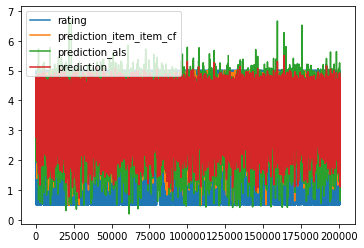

In [12]:
prediction_df.drop(['userId', 'movieId'], axis=1).plot()

<AxesSubplot:>

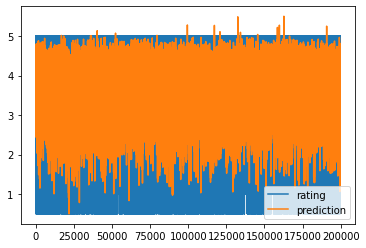

In [36]:
prediction_df.drop(['userId', 'movieId', 'prediction_item_item_cf', 'prediction_als'], axis=1).plot()

<AxesSubplot:>

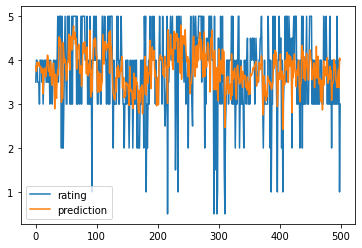

In [39]:
prediction_df[:500].drop(['userId', 'movieId', 'prediction_item_item_cf', 'prediction_als'], axis=1).plot()